## Problema NRainhas


In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.1 MB/s eta 0:00:00


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [3]:
# Função objetivo: número de pares de rainhas não-atacadas
# nQueens: Numero de rainhas
# Solução ótima: (nQueens x nQueens-1)/2
def fitnessFunction(solucao):
        melhorFitness = (len(solucao) * (len(solucao) - 1) // 2)
        #Número de ataques
        h = 0
        #Contagem de ataques na diagonal e vertical
        for i in range(0, len(solucao)):
            for j in range(i+1, len(solucao)):
                if abs(i - j) == abs(solucao[i] - solucao[j]):
                   h += 1
                # Ataques por linha (horizontal)
                if abs(solucao[i] - solucao[j]) == 0:
                   h += 1
        return melhorFitness - h,

In [23]:
# Gera o objetivo toolbox responsável por registrar as configurações do framewrok
toolbox = base.Toolbox()

# Tamanho do problema
nQueens = 10

# Cria o tipo de função fitness e indivíduo
creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Cromossomo", list,fitness=creator.Maximization)

# Registra os nomes e os tipos de individuo, fiteness e população
toolbox.register("atributo", random.randint, 1, nQueens)
toolbox.register("solucaoFinal", tools.initRepeat, creator.Cromossomo, toolbox.atributo,n=nQueens)
toolbox.register("Populacao", tools.initRepeat, list, toolbox.solucaoFinal)

# Registra os operadores. Deve-se manter os nomes evaluate, mate, mutate e select
toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=nQueens, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize = 3)
# toolbox.register("select", tools.selBest)

In [34]:
# Cadastro de parâmetros e estatíticas
pop = toolbox.Populacao(n=50)
prob_cx = 0.5
prob_mt = 0.5
nger = 1000

# Estatística
st = tools.Statistics(key = lambda ind: ind.fitness.values)
st.register("Max", numpy.max)
st.register("Avg", numpy.mean)

In [35]:
# Execução do ALgoritmo
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, st, verbose=True)

melhorSolucao = tools.selBest(finalPop, 1)
print(f'Optimal Solution: {(nQueens* (nQueens-1))//2}')
print(f'Melhor Fitness: {melhorSolucao[0].fitness.values}')

gen	nevals	Max	Avg 
0  	50    	40 	34.6
1  	37    	40 	36.12
2  	40    	42 	37.9 
3  	33    	42 	38.38
4  	36    	42 	38.92
5  	45    	42 	38.58
6  	26    	42 	39.46
7  	38    	42 	39.74
8  	40    	42 	39.66
9  	34    	42 	40.32
10 	41    	42 	40.8 
11 	35    	42 	40.76
12 	35    	43 	41.28
13 	38    	43 	41.22
14 	41    	43 	41.74
15 	37    	43 	41.72
16 	39    	43 	41.8 
17 	38    	43 	41.86
18 	38    	43 	42.52
19 	38    	43 	42.22
20 	43    	43 	42.22
21 	42    	43 	42.2 
22 	36    	43 	41.82
23 	39    	43 	42.04
24 	38    	43 	41.88
25 	31    	43 	42.46
26 	39    	43 	42.18
27 	36    	43 	42.02
28 	34    	44 	42.5 
29 	40    	44 	42.42
30 	37    	44 	42.22
31 	31    	44 	42.18
32 	34    	44 	42.34
33 	35    	44 	42   
34 	33    	44 	42.72
35 	43    	44 	42.56
36 	39    	44 	43   
37 	39    	44 	43.4 
38 	38    	44 	43.34
39 	32    	44 	42.96
40 	38    	44 	43.04
41 	39    	44 	42.96
42 	32    	44 	43.06
43 	38    	44 	43.08
44 	40    	44 	42.76
45 	41    	44 	43.16
46 	33    	44 	

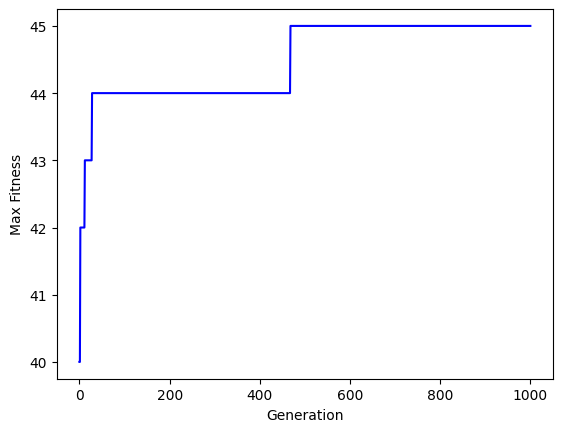

In [36]:
# Curva de convergência
import matplotlib.pyplot as plt

# extract statistics:
maxFit = log.select("Max")

# plot statistics:
plt.plot(maxFit, color='blue')
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.show()


#### Teste com Mu + Lambda

In [39]:
# Cadastra algoritmo Mu+Lambda
mu = 30
_lambda = 30
popMu_Lambda = toolbox.Populacao(n=mu)
finalPop, log = algorithms.eaMuPlusLambda(popMu_Lambda, toolbox, mu, _lambda, prob_cx, prob_mt, nger, st, verbose=False)

melhorSolucao = tools.selBest(finalPop, 1)
print(f'Optimal solution: {(nQueens * (nQueens-1))//2}')
print(f'Solucao: {melhorSolucao[0]} - Fitness {melhorSolucao[0].fitness.values}')

Optimal solution: 45
Solucao: [7, 2, 4, 6, 9, 5, 10, 1, 3, 8] - Fitness (45.0,)


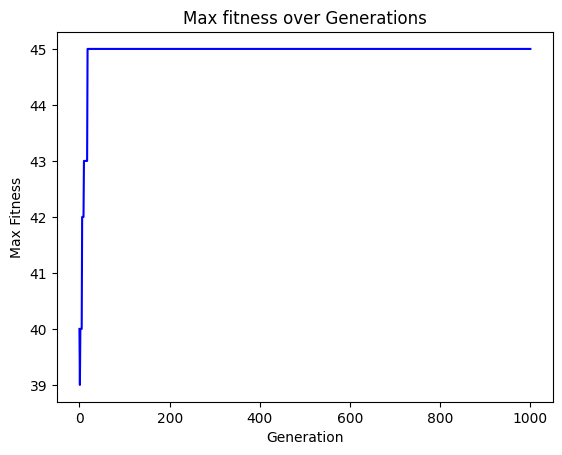

In [40]:
# extract statistics:
maxFitnessValues = log.select("Max")

# plot statistics:
plt.plot(maxFitnessValues, color='blue')
plt.xlabel('Generation')
plt.ylabel('Max Fitness')
plt.title('Max fitness over Generations')
plt.show()